## Binary Logistic Regression
Dataset: iris

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
file = pd.read_csv('../ML/Datasets/iris.csv')
file = file.query("species == ('setosa', 'versicolor')")

x1 = file['sepal_length'].values
x2 = file['sepal_width'].values
y = file['species'].values

y = (y == 'setosa').astype(int)
x = np.c_[x1, x2]

file.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


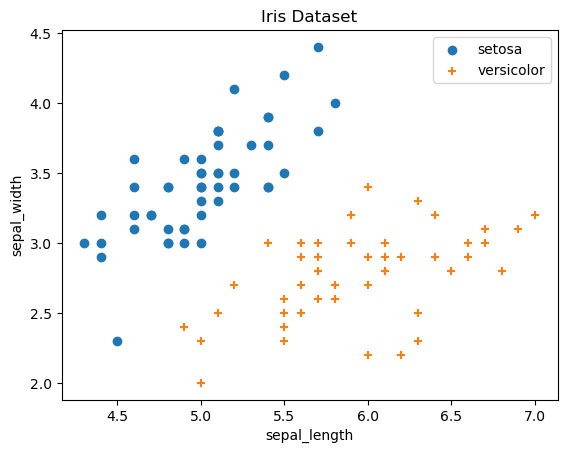

In [4]:
def plot_data():
    plt.scatter(x1[np.where(y == 1)], x2[np.where(y == 1)], label='setosa')
    plt.scatter(x1[np.where(y == 0)], x2[np.where(y == 0)], marker= '+', label='versicolor')
    plt.title("Iris Dataset")
    plt.xlabel("sepal_length")
    plt.ylabel("sepal_width")
    plt.legend()
    plt.show()
plot_data()

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
def compute_cost(x, y, w, b, lambda_ = 1):
    m,n = x.shape
    cost = 0
    for i in range(m):
        z = sigmoid(np.dot(x[i],w) + b)
        cost += -y[i] * np.log(z) - (1-y[i]) * np.log(1-z)
    return cost /m

In [7]:
def compute_grad(x, y, w, b, lambda_ = None):
    m, n = x.shape
    dw, db = np.zeros(w.shape), 0.
   
    for i in range(m):
        yi = sigmoid(np.dot(x[i], w) + b)
        err = yi - y[i]

        for j in range(n):
            dw[j] += err * x[i, j]

        db += err

    return dw/m, db/m

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, lambda_, iters, cost_func, grad_func):
    m = len(x)
    j_hist, w_hist = [], []

    for i in range(iters):
        dw, db = grad_func(x, y, w_in, b_in, lambda_)
        w_in -= alpha * dw
        b_in -= alpha * db

        if(i<100000):
            cost = cost_func(x, y, w_in, b_in, lambda_)
            j_hist.append(cost)

        if i% math.ceil(iters/10) == 0 or i == (iters-1):
            w_hist.append(w_in)
            print(f"Iteration {i:4}: Cost {float(j_hist[-1]):8.2f}")

    return w_in, b_in, j_hist, w_hist

In [9]:
np.random.seed(1)
init_w = 0.01*(np.random.rand(x.shape[1]).reshape(-1, 1) - 0.5)
init_b = -8
iterations = 10000
alpha = 0.01

w, b, j_hist, _ = gradient_descent(x, y, init_w, init_b, alpha, 0, iterations, 
                                   compute_cost, compute_grad)

Iteration    0: Cost     3.90
Iteration 1000: Cost     0.45
Iteration 2000: Cost     0.31
Iteration 3000: Cost     0.24
Iteration 4000: Cost     0.20
Iteration 5000: Cost     0.18
Iteration 6000: Cost     0.16
Iteration 7000: Cost     0.15
Iteration 8000: Cost     0.14
Iteration 9000: Cost     0.13
Iteration 9999: Cost     0.13


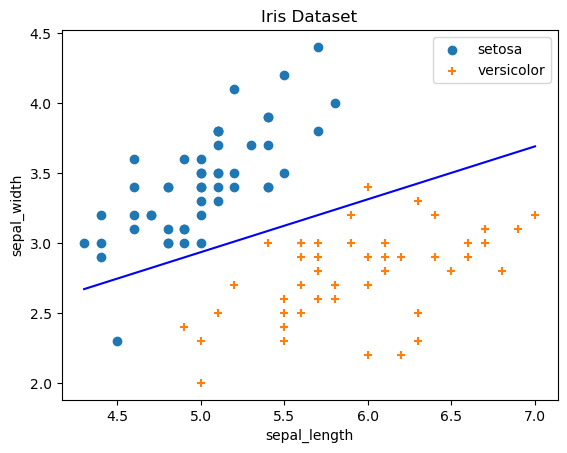

In [16]:
plot_x = np.array([min(x[:, 0]), max(x[:, 0])])
plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
plt.plot(plot_x, plot_y, c="b")
plot_data()

In [11]:
def predict(x, w, b):
    m,_ = x.shape
    p = np.zeros(m)

    for i in range(m):
        z = sigmoid(np.dot(x[i], w) + b)
        p[i] = 1 if (z > 0.5) else 0

    return p

In [12]:
def cal_accuracy(y_true, y_pred):
    return np.mean(np.equal(y_true, y_pred))

In [13]:
print("Train Accuracy : ", cal_accuracy(y, predict(x, w, b)))

Train Accuracy :  0.98
